### Regressão no Scikit-Learn
- https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
<br><br>
- Vamos usar a base de ações da Tesla para tentar prever a quantidade de ações vendidas no dia
    - Base: https://www.kaggle.com/datasets/timoboz/tesla-stock-data-from-2010-to-2020

In [1]:
import pandas as pd

In [9]:
base = pd.read_csv('TSLA.csv',parse_dates=['Date'])

In [10]:
# base['Date'] = pd.to_datetime(base['Date'])

In [11]:
base.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,19.000000,25.00,17.540001,23.889999,23.889999,18766300
1,2010-06-30,25.790001,30.42,23.299999,23.830000,23.830000,17187100
2,2010-07-01,25.000000,25.92,20.270000,21.959999,21.959999,8218800
3,2010-07-02,23.000000,23.10,18.709999,19.200001,19.200001,5139800
4,2010-07-06,20.000000,20.00,15.830000,16.110001,16.110001,6866900


In [12]:
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2416 entries, 0 to 2415
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       2416 non-null   datetime64[ns]
 1   Open       2416 non-null   float64       
 2   High       2416 non-null   float64       
 3   Low        2416 non-null   float64       
 4   Close      2416 non-null   float64       
 5   Adj Close  2416 non-null   float64       
 6   Volume     2416 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 132.3 KB


In [13]:
base.describe()

,Date,Open,High,Low,Close,Adj Close,Volume
count,2416,2416.000000,2416.000000,2416.000000,2416.000000,2416.000000,2.416000e+03
mean,2015-04-15 11:09:56.026490112,186.271147,189.578224,182.916639,186.403651,186.403651,5.572722e+06
min,2010-06-29 00:00:00,16.139999,16.629999,14.980000,15.800000,15.800000,1.185000e+05
25%,2012-11-19 18:00:00,34.342498,34.897501,33.587501,34.400002,34.400002,1.899275e+06
50%,2015-04-16 12:00:00,213.035004,216.745002,208.870002,212.960007,212.960007,4.578400e+06
75%,2017-09-07 06:00:00,266.450012,270.927513,262.102501,266.774994,266.774994,7.361150e+06
max,2020-02-03 00:00:00,673.690002,786.140015,673.520020,780.000000,780.000000,4.706500e+07
std,NaN,118.740163,120.892329,116.857591,119.136020,119.136020,4.987809e+06


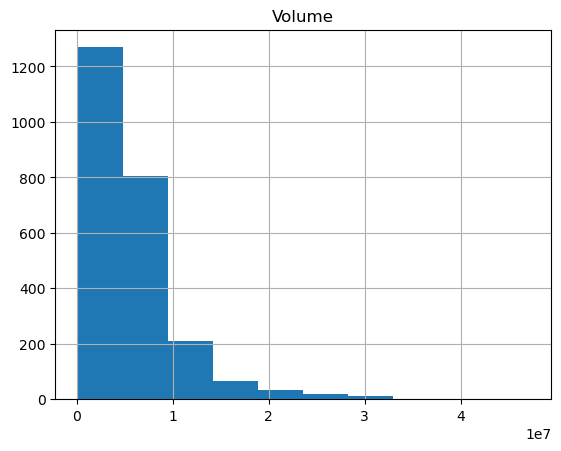

In [15]:
base.hist('Volume');

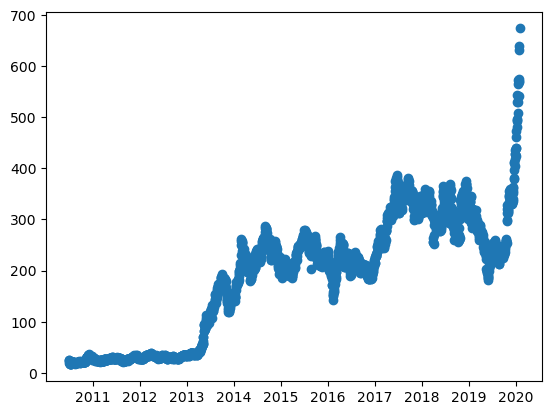

In [17]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()

ax.scatter(base.Date, base.Open)

plt.show()

In [24]:
# importei e separei a base em treino e teste
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(base.Open,base.Volume, test_size=0.33, random_state=42)

In [25]:
# importar a regresao linear
from sklearn.linear_model import LinearRegression

In [27]:
# criando nosso algoritmo de regressao
reg = LinearRegression().fit(x_train.values.reshape(-1,1), y_train)

In [28]:
# avaliando o modelo nos dados de TREINO
reg.score(x_train.values.reshape(-1,1),y_train)

0.21503603604976262

In [29]:
# avaliando o modelo nos dados de TESTE
reg.score(x_test.values.reshape(-1,1),y_test)

0.3284195874914201

In [30]:
# coeficiente angular
reg.coef_

array([20195.18797365])

In [31]:
# coeficiente linear
reg.intercept_

1904679.7631864217

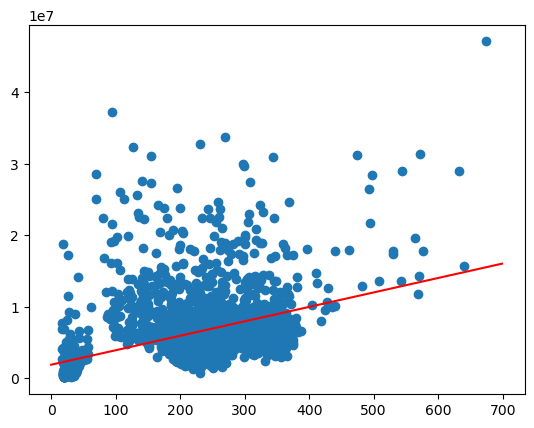

In [35]:
# vizualizando de forma grafica
import numpy as np

a = reg.coef_[0]
b = reg.intercept_

x = np.arange(0,700)
y = a*x+b

fig, ax = plt.subplots()
ax.scatter(base.Open,base.Volume)
ax.plot(x,y, c='r')

plt.show()

adicionando novas variaveis ao modelo

In [36]:
base.head(2)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,19.000000,25.00,17.540001,23.889999,23.889999,18766300
1,2010-06-30,25.790001,30.42,23.299999,23.830000,23.830000,17187100


In [40]:
# definindo um x e y
x = base[['Open', 'Close']]
y = base.Volume

In [41]:
# separando novamente entre treino e teste
from sklearn.model_selection import train_test_split
x_train2,x_test2,y_train2,y_test2 = train_test_split(x,y, test_size=0.33, random_state=42)

In [43]:
# usando a regressao linear
reg2 = LinearRegression().fit(x_train2,y_train2)

In [44]:
# avaliando nos dados de treino
reg2.score(x_train2,y_train2)

0.22785369984571147

In [45]:
# avaliando nos dados de teste
reg2.score(x_test2,y_test2)

0.32041857487852254